## 回归拟合

AT-PE
[[-2.17131996]] [ 497.03411989]
V-PE
[[-1.16813513]] [ 517.80152631]
AP-PE
[[ 1.48987167]] [-1055.26098898]
RH-PE
[[ 0.4556501]] [ 420.96176616]


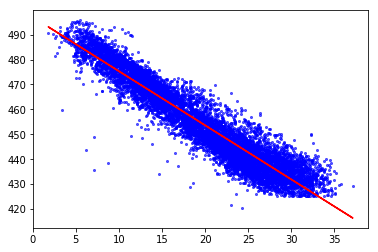

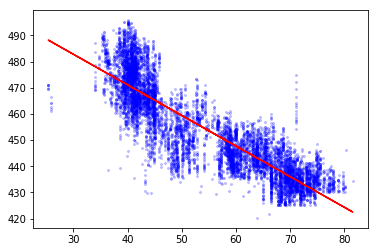

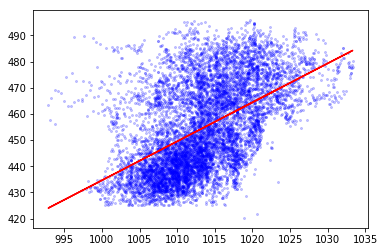

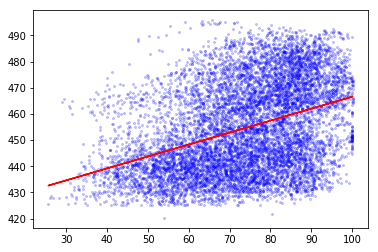

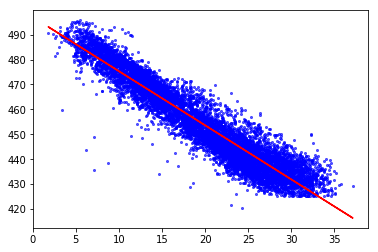

In [2]:
import xlrd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn import linear_model
data = xlrd.open_workbook('./CCPP/Folds5x2_pp.xlsx')

#读取数据，将xls中的数据读取出来
sheet1 = data.sheet_by_name('Sheet1')

sheet2 = data.sheet_by_name('Sheet2')
sheet3 = data.sheet_by_name('Sheet3')
sheet4 = data.sheet_by_name('Sheet4')
sheet5 = data.sheet_by_name('Sheet5')

#训练集
AT_tran = sheet1.col_values(0)[1:] + sheet2.col_values(0)[1:] + sheet3.col_values(0)[1:] + sheet4.col_values(0)[1:]
V_tran = sheet1.col_values(1)[1:] + sheet2.col_values(1)[1:] + sheet3.col_values(1)[1:] + sheet4.col_values(1)[1:]
AP_tran = sheet1.col_values(2)[1:] + sheet2.col_values(2)[1:] + sheet3.col_values(2)[1:] + sheet4.col_values(2)[1:]
RH_tran = sheet1.col_values(3)[1:] + sheet2.col_values(3)[1:] + sheet3.col_values(3)[1:] + sheet4.col_values(3)[1:]
PE_tran = sheet1.col_values(4)[1:] + sheet2.col_values(4)[1:] + sheet3.col_values(4)[1:] + sheet4.col_values(4)[1:]

#测试集
AT_test = sheet5.col_values(0)[1:]
V_test = sheet5.col_values(1)[1:]
AP_test = sheet5.col_values(2)[1:]
RH_test = sheet5.col_values(3)[1:]
PE_test = sheet5.col_values(4)[1:]


n = len(AT_tran)    #数据个数
N = len(sheet1.col_values(1)[1:])

datas = {'AT':AT_tran, 'V':V_tran, 'AP':AP_tran, 'RH':RH_tran, 'PE':PE_tran}

#AT-PE散点图
X = np.reshape(AT_tran, (-1, 1))
Y = np.reshape(PE_tran, (-1, 1))
clf = linear_model.LinearRegression()
clf.fit( X ,Y)

plt.plot(X, Y, 'o', color = 'blue', alpha = 0.2, markersize = 2)
plt.plot(X,clf.predict(X), color = 'red')
print('AT-PE')
print(clf.coef_, clf.intercept_)

plt.figure()

#V-PE散点图
X = np.reshape(sheet1.col_values(1)[1:],(N, 1)) 
Y = np.reshape( sheet1.col_values(4)[1:], (N, 1))
clf = linear_model.LinearRegression()
clf.fit( X ,Y)
print('V-PE')
print(clf.coef_, clf.intercept_)

plt.plot(X, Y, 'o', color = 'blue', alpha = 0.2, markersize = 2)
plt.plot(X,clf.predict(X), color = 'red')

plt.figure()

#AP-PE散点图
X = np.reshape(sheet1.col_values(2)[1:],(N, 1)) 
Y = np.reshape( sheet1.col_values(4)[1:], (N, 1))
clf = linear_model.LinearRegression()
clf.fit( X ,Y)
print('AP-PE')
print(clf.coef_, clf.intercept_)

plt.plot(X, Y, 'o', color = 'blue', alpha = 0.2, markersize = 2)
plt.plot(X,clf.predict(X), color = 'red')

plt.figure()

#RH-PE散点图
X = np.reshape(sheet1.col_values(3)[1:],(N, 1)) 
Y = np.reshape( sheet1.col_values(4)[1:], (N, 1))
clf = linear_model.LinearRegression()
clf.fit( X ,Y)
print('RH-PE')
print(clf.coef_, clf.intercept_)
#
plt.plot(X, Y, 'o', color = 'blue', alpha = 0.2, markersize = 2)
plt.plot(X,clf.predict(X), color = 'red')

plt.figure()


X = np.reshape(AT_tran, (n, 1))
Y = np.reshape(PE_tran, (n, 1))
clf = linear_model.LinearRegression()
clf.fit( X ,Y)

plt.plot(X, Y, 'o', color = 'blue', alpha = 0.2, markersize = 2)
plt.plot(X,clf.predict(X), color = 'red')

plt.show()